<a href="https://colab.research.google.com/github/Asmit-Dhakal/Deep_learning/blob/main/01_pytorch_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **# Pytorch Work-flow**

In [1]:
topics={
    1:"data(prepare and load)",
    2: "build model",
    3: "fitting the model to the data(training)",
    4: "making prediciton and evaluating a model",
    5: "saving and loading model",
    6: "conclusion"
}

In [2]:
topics

{1: 'data(prepare and load)',
 2: 'build model',
 3: 'fitting the model to the data(training)',
 4: 'making prediciton and evaluating a model',
 5: 'saving and loading model',
 6: 'conclusion'}

In [3]:
import torch
from torch import nn # nn contain all building block for neural network
import matplotlib.pyplot as plt

# Check pytorch version
torch.__version__



'2.2.1+cu121'

Machine learning has tow parts:
1. Get data into a numerical representation
2. Build a model to learn patterns in that numerical representation

In [4]:
# let us use linear regression formula and make straight line

## Create *known* parameters
weight=0.7
bias=0.3

# Create
start = 0
end =1
step =0.02
X = torch.arange(start,end,step).unsqueeze(dim=1)
y=weight*X + bias
X[:10], y[:10]



(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [5]:
len(X) ,len(y)

(50, 50)

In [6]:

# Spliting data into traing and test set .(one of the most important concepts in machine learning in general)
# Create a train /test split
train_split= int(0.8*len(X))
X_train,y_train =X[:train_split],y[:train_split]
X_test,y_test=X[train_split:], y[train_split:]

len(X_train) , len(y_train), len(X_test),  len(y_test)

(40, 40, 10, 10)

Visualize our Data


In [7]:
def plot_prediction(
    train_data =X_train,
    train_labels=y_train,
    test_data=X_test,
    test_labels=y_test,
    predictions=None):
  """
  Plots training data, test data and compare predicitons.

  """
  plt.figure(figsize=(10,7))

  # Plot training data in blue
  plt.scatter(train_data,train_labels, c="b",s=4, label="Training data")


  # Plot testing data in green
  plt.scatter(test_data,test_labels, c="g",s=4, label="Testing data")
  # Are there any predicitons
  if predictions is not None:
    # Plot the prediciton if they exist
    plt.scatter(test_data,predictions,c="r", s=4, label="Predicitions")

  # Show the legend
  plt.legend(prop={"size":14});

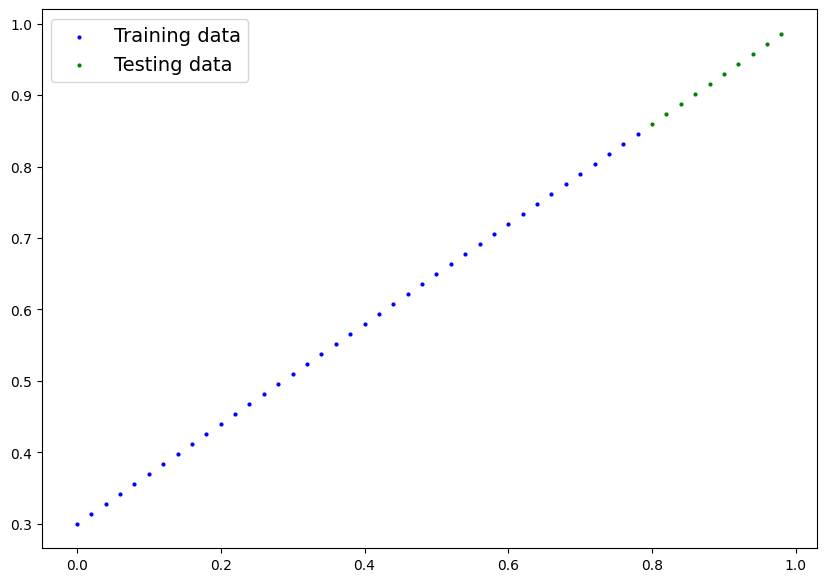

In [8]:
plot_prediction();

 # 2.Building pytorch model
  Our model works as:

  * Start with random values (weight @ bias)
  * Look at the training and adjust the random values to better represent (or get closer to ) the ideal values (the weight & bias values we used to create the data)

  How does it do so ?

  Through two algorithm
  1. Gradient descent
  2. Backpropogration  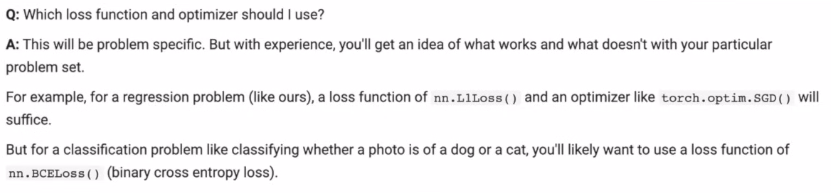

In [9]:
from torch import nn

# Create linear regression model class
class LinearRegressionModel(nn.Module): # <-almost everything in pytorch extract
  def __init__(self):
    super().__init__()
    self.weights=nn.Parameter(torch.randn(1,requires_grad=True, dtype=torch.float))
    self.bias=nn.Parameter(torch.randn(1,requires_grad =True, ))

  # Forward methods to define the computations in the model
  def forward(self, x:torch.Tensor) ->torch.Tensor: # <- "x" is the input data
      return self.weights*x + self.bias # this is the formula of linear regression






## PyTorch model building essentials

* torch.nn - contains all of the buildings for computational graphs ( a neural network)
* torch.nn.parameter -what model should try and learn
* torch.nn.Module - THe base class for all neural network modules, if you subclass it, you should overwrite forward()
* torch.optim - this whrere the optimizers in pytorch live, they will help in gradient descent
* def forward() - all nn.Module subclasses requires you to overwrite forward (), this method defines what happens in the forward computation


In [10]:
# Create a random seed
torch.manual_seed(42)

# Create an instance of the model (this is a subclass of nn.module)
model_0= LinearRegressionModel()
model_0

# Check out parameters
list(model_0.parameters())


[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [11]:
# list named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [12]:
weight, bias

(0.7, 0.3)

### Make predicition using `torch.inference_mode()`
 To check our models predicitve power, lets see how well it predicts `y_test` based on `x_test`

WHen we pass data through our model, its going to run it through the forward() methods.

In [13]:
# Make predicition with model
with torch.inference_mode():
   y_preds=model_0(X_test)

# Similar to inference
#with torch.no_grad()
#y_preds = model_0(X_test)


y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

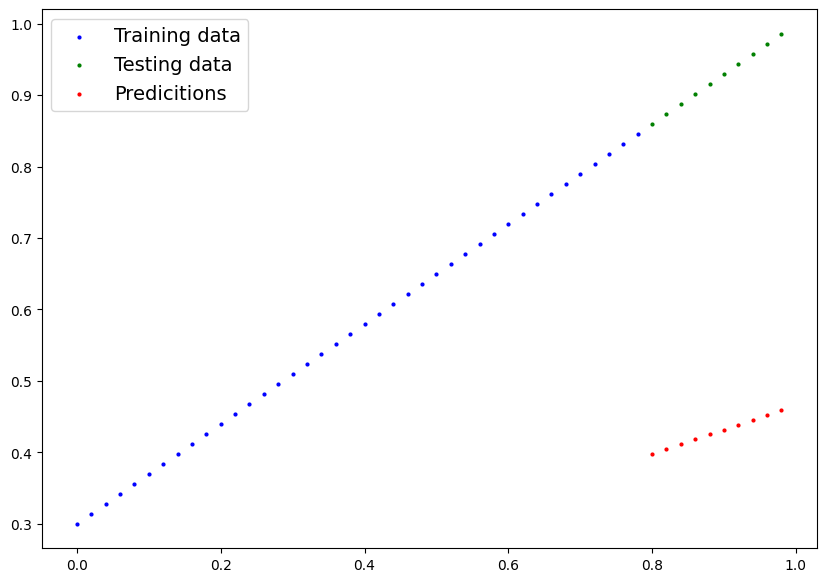

In [14]:
plot_prediction(predictions=y_preds)

##  We need to measure how poor our model is by loss function

* Note: Loss function also called cost function
* Loss Function:- check model prediciton and lower is better
* Optimzer:- Take into account of loss of a model and adjust the models

params: model parameters you'd like to optimize

lr: learning rate is a hyperparameter that defines how big/small the optimizer changes the parameter with each step (small lr results small changes and vice-versa)


 parameters(eg: weight & bias)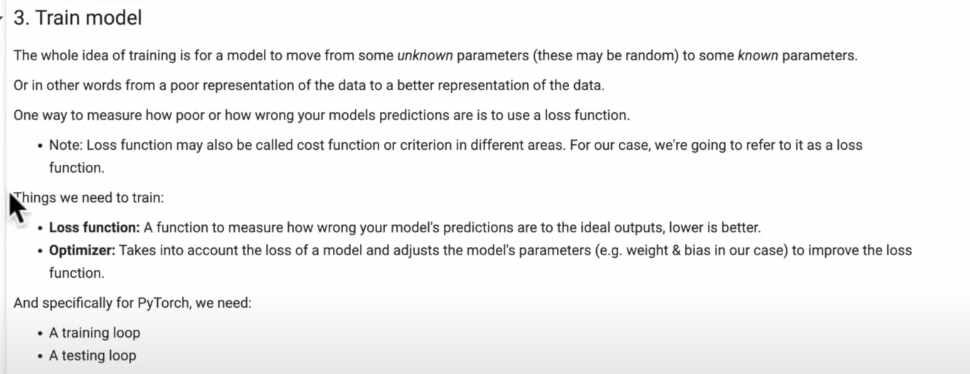

In [15]:
model_0.parameters()
# CHeck out model's parameters ( a parameter is a value that the model sets itself)
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [16]:
# Setup a loss function
loss_fn =nn.L1Loss()

# Setup an optimizer(stochastic gradient descent)
optimizer =torch.optim.SGD(params=model_0.parameters(),lr=0.01)

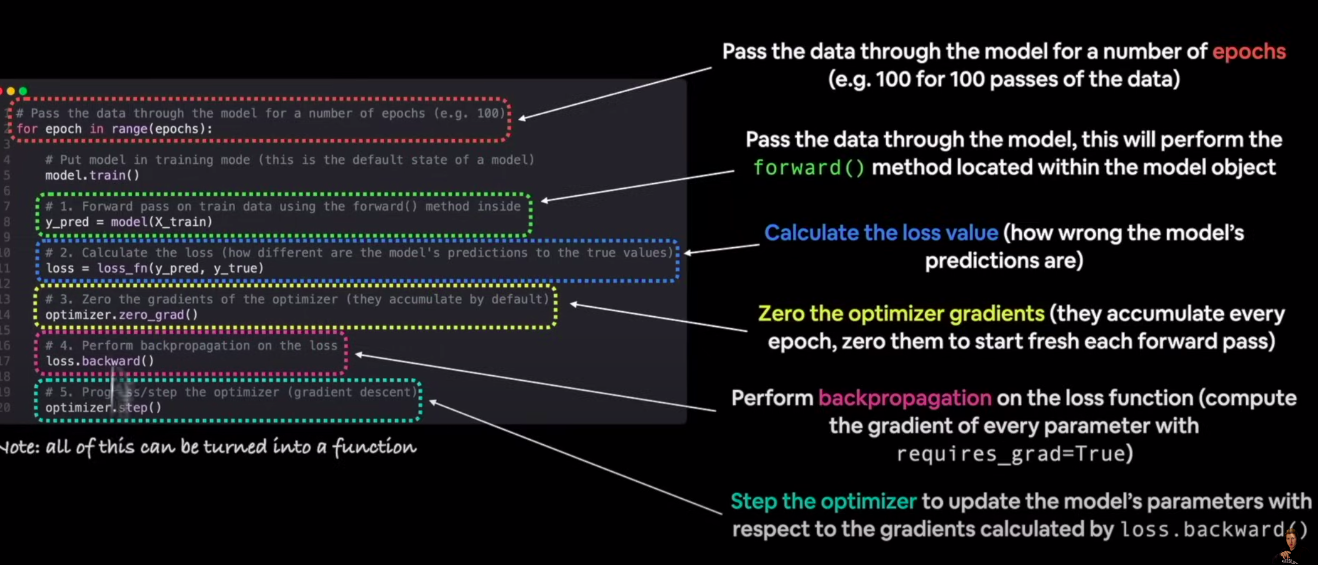# Building a training loop (and a testing loop) in Pytorch
A couple of thing we need in a training loop
0. Loop through the data
1.Forward pass(this involves data moving through our model`forward()`)
2. Calculate the loss (compare forward pass prediciton to ground truth labels)
3. Optimizer zero grand
4. Loss Backward - move backwards through the network to calculate the gradient of each of the parameters odf our model with respect to the loss **backpropagation**)
5. Optimizer step - use the optimzer to adjust our models parameters to try and imporve the loss(** gradient descent**)


In [17]:
torch.manual_seed(42)

# is is one loop through data...
epochs =100
epoch_count=[]
loss_values=[]
test_loss_values= []

### Training
# 0.Loop through the data
for epoch in range(epochs):
  # Set the model to training mode
  model_0.train() # train mode in Pytorch sets all parameters that required graident to require gradients

# 1.Forward pass
  y_pred = model_0(X_train)


# 2.Calculate the loss
  loss= loss_fn(y_pred,y_train)
  print(f"Loss: {loss}")

# 3.Optimizer zero grand
  optimizer.zero_grad()


  #4. Perform backpropagation on the loss with respect to the parameter of the mode
  loss.backward()

  # 5. Step the optimizer (perform gradient descent)
  optimizer.step()

  ### Testing
  model_0.eval() # turns off different setting in the model not needed for evaluating /testing
  with torch.inference_mode(): # turns off gradient tracking and a couple more things behind the scenes

    #1. DO the forward pass
     test_pred=model_0(X_test)

     #2. Calcualte the  loss
     test_loss = loss_fn(test_pred, y_test)

  # Print out what happening
  if epoch % 10 == 0:
    epoch_count.append(epoch)
    loss_values.append(epoch)
    test_loss_values.append(epoch)

    print(f"Epoch:{epoch} | loss: {loss} | Test loss: {test_loss}")
    #Print out model stat_dict()
    print(model_0.state_dict())



Loss: 0.31288138031959534
Epoch:0 | loss: 0.31288138031959534 | Test loss: 0.48106518387794495
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
Loss: 0.3013603389263153
Loss: 0.28983935713768005
Loss: 0.2783183455467224
Loss: 0.26679736375808716
Loss: 0.2552763521671295
Loss: 0.24375534057617188
Loss: 0.23223432898521423
Loss: 0.22071333229541779
Loss: 0.20919232070446014
Loss: 0.1976713240146637
Epoch:10 | loss: 0.1976713240146637 | Test loss: 0.3463551998138428
OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.2388]))])
Loss: 0.18615034222602844
Loss: 0.1746293306350708
Loss: 0.16310831904411316
Loss: 0.1515873372554779
Loss: 0.14006635546684265
Loss: 0.1285453587770462
Loss: 0.11702437698841095
Loss: 0.1060912236571312
Loss: 0.09681284427642822
Loss: 0.08908725529909134
Epoch:20 | loss: 0.08908725529909134 | Test loss: 0.21729660034179688
OrderedDict([('weights', tensor([0.4184])), ('bias', tensor([0.3333]))])
Loss: 0.08227583020925522
Loss: 0.07

In [18]:
epoch_count,loss_values, test_loss_values

([0, 10, 20, 30, 40, 50, 60, 70, 80, 90],
 [0, 10, 20, 30, 40, 50, 60, 70, 80, 90],
 [0, 10, 20, 30, 40, 50, 60, 70, 80, 90])

In [19]:
import numpy as np
np.array(torch.tensor(loss_values).cpu().numpy()),

(array([ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90]),)

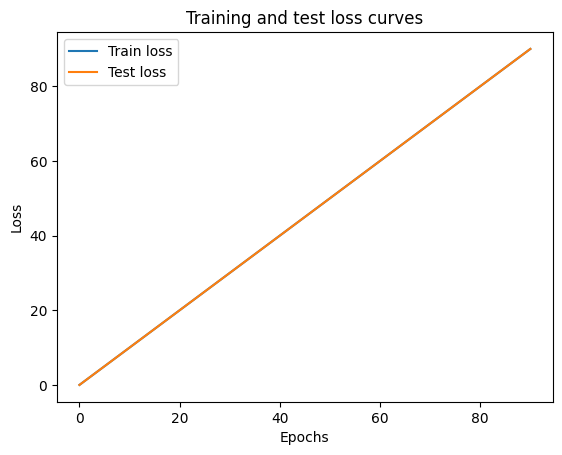

In [20]:
# Plot the loss curves
plt.plot (epoch_count,np.array(torch.tensor(loss_values).numpy()), label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title('Training and test loss curves')
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

In [21]:
with torch.inference_mode():
  y_preds_new=model_0(X_test)

In [22]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.5784])), ('bias', tensor([0.3513]))])

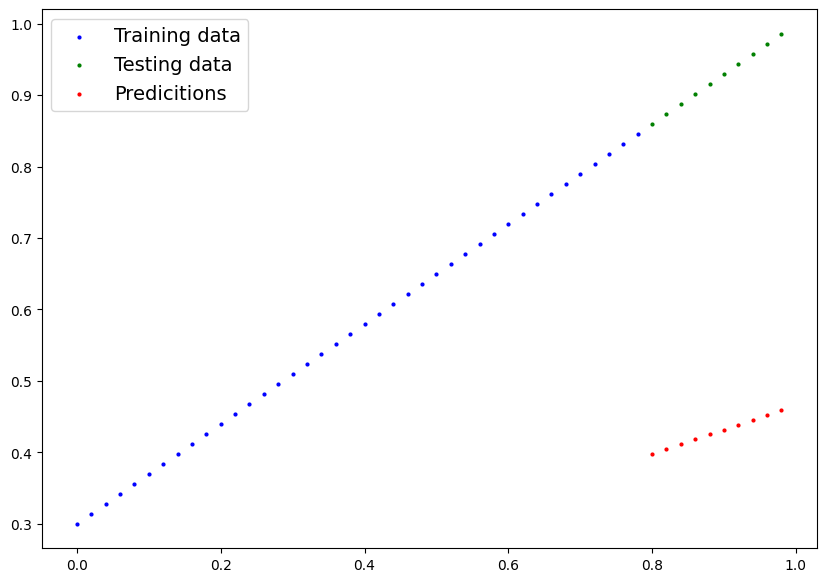

In [23]:
plot_prediction(predictions=y_preds)

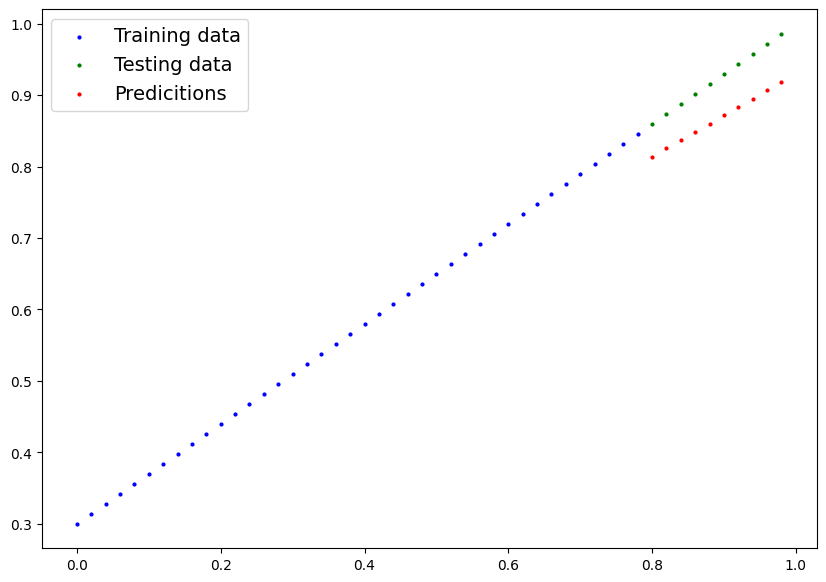

In [24]:
plot_prediction(predictions=y_preds_new)

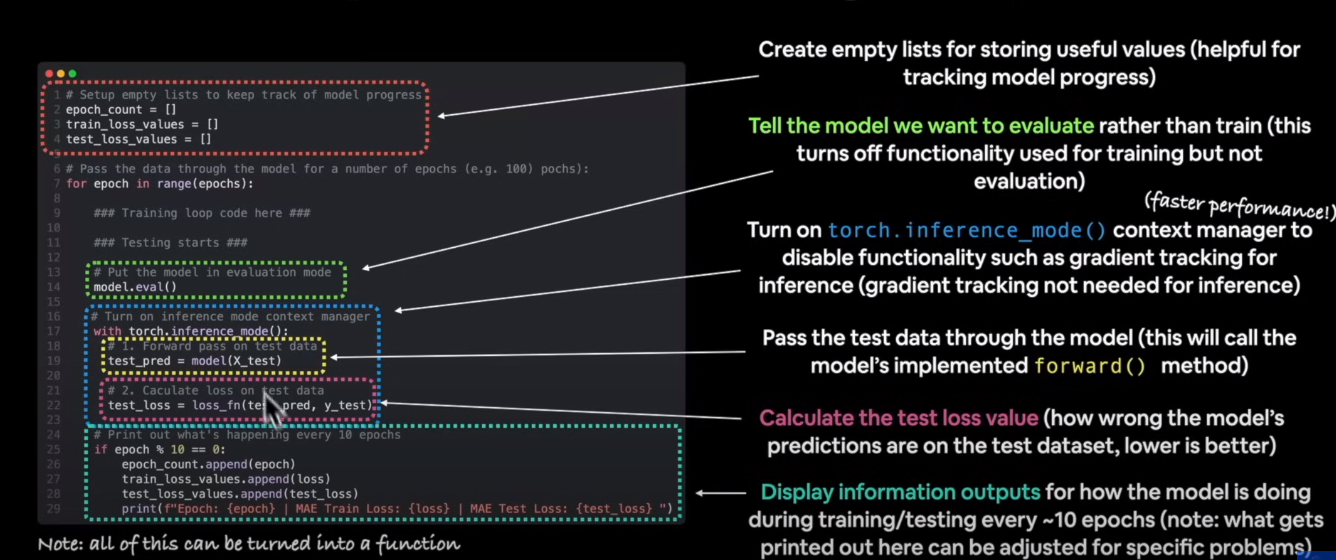

# Saving  a model in pytorch
 There are three main method you should about for saving and loading models in Pytorch

 `torch.save()`-allow you to save a Pytorch object in Pytorch pickle format

 `torch.load()` - allow you load a saved Pytorch object

 `torch.nn.Module.load_state_dict()` - this allow to load a model saved state dictionary

In [25]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.5784])), ('bias', tensor([0.3513]))])

In [26]:
!pip install pathlib


In [30]:
 # Saving our Pytorch model
from pathlib import Path

 # 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True,exist_ok=True)

#2. Create model save path
MODEL_NAME= "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME
MODEL_SAVE_PATH

# #.Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(), f=MODEL_SAVE_PATH)


Saving model to: models/01_pytorch_workflow_model_0.pth


In [31]:
model_0

LinearRegressionModel()